# Applied Machine Learning: Module 3 (Evaluation)

## Evaluation for Classification

We'll be focusing first on the widely used case of evaluating binary classification. And then we'll look at evaluation for the more general case of multi-class evaluation as well as regression. 

### Preamble

We'll start here using the digits dataset, which has images of handwritten digits labeled with ten classes, representing the digits zero through nine. As we can see by letting the dataset and then computing the count of instances in each class, using numpy's `bincount method`, there are roughly the same number of instances in each class. So this dataset has balanced classes.

In [5]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


However with this digits dataset, what we're going to do is create a new dataset with two imbalanced classes by labelling all digits that are not the digit $1$ as the negative class with label `0`, and digits that are $1$ as the positive class, label `1`. So what we're doing here is dump the first few entries from the original labels along with the new binary label, so we can see the imbalance visually.

In [6]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


Now when we use `bincount`, we can see that there are about 1,600 negative examples, but only 182 positive examples. So indeed, we have a dataset that is class imbalanced

In [7]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182], dtype=int64)

Now let's create a train test partition on this imbalanced set. And then we'll train a support vector machine classifier with these binary labels using the radial basis function as a kernel. We get the accuracy using the score method, and we can see this is just over 90%. Again at first glance, 90% accuracy for a classifier seems pretty good. However, now let's create a Dummy Classifier that correctly reflect the class imbalance to see if 90% really is that impressive.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9088888888888889

### Dummy Classifiers

scikit-learn makes it easy to create a dummy classifier just by using the `DummyClassifier`. `DummyClassifier` is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

Dummy classifiers are called such because they don't even look at the data to make a prediction. They simply use the strategy that you instruct them to use, when creating them. In fact, when you create the classifier, you set the strategy argument to tell it what rule of thumb to use to make its predictions. So here, we set this to the most frequent strategy to predict the most frequent class.

The Dummy Classifier here is used just like a regular classifier. So to prepare it for prediction, we call the fit method on the x_train and y_train variables that hold the training set instances and labels. Finally, just like a regular classifier, we can call the predict method to make predictions on the test set.

In [9]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Now we can call the usual score method to get the accuracy of the DummyClassifier's constant negative prediction.

In [10]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

And we can see it's also 90%, the same as our earlier support vector machine classifier with radio bases function kernel. So that support vector classifier was actually performing only very slightly better than the Dummy Classifier.

In [11]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

You should not use a dummy classifier for real classification problems, but it does provide a useful sanity check in point of comparison. 

### Confusion matrices

#### Binary (two-class) confusion matrix

Scikit-learn makes it easy to compute a confusion matrix for our classifier. Here, we import the `confusion_matrix` class from `sklearn.metrics`. We're going to use the same training set from the digits data set with the binary imbalance labels that we created earlier. To get the confusion matrix, we simply pass the `y_test` set of predicted labels and the `y_predicted` set of predicted labels and then print the output. 

The order of the cells in the matrix output in the following order: true negative and false negative are in the first column, and true positive and false positive are in the second column. In particular, the successful predictions of the classifier are on the diagonal where the true class matches the predicted class. The cells off the diagonal represent errors of different types.

In [12]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


What we can see here is that the right column, that represent cases where the classifier predicted the positive class, is all zero. This makes sense for this dummy classifier because it's always predicting the negative class, the most frequent one. We see that 407 instances are true negatives, and there are 43 errors that are false negatives.

Below we apply the stratified Dummy Classifier that gives random output in proportion to the ratio labels in the training set. Now the right column is no longer all zero because this Dummy Classifier does occasionally predict the positive class. 

In [13]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[361  46]
 [ 41   2]]


In the below case, we'll apply a support vector classifier with linear kernel and seed parameter equal to one. We note that looking along the diagonal compared to the stratified dummy classifier above, the support vector classifier has more correct predictions on the same data set.

In [14]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


Likewise, we can apply a logistic regression classifier, and that obtains similar results to the support vector classifier.

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


And finally, we can apply a decision tree classifier, and look at the confusion matrix that results from that. One thing we notice is, that unlike the support vector or logistic regression classifier, which had balanced numbers of false negatives and false positives. The decision tree makes more than twice as many false negative errors, 17 of them actually, as false positive errors, of which there are 7.

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Evaluation metrics for binary classification

- TN: True Negative

- FN: False Negative

- FP: False Positive

- TP: True Positive

- Accuracy: What we're used to seeing, the accuracy

- Precision: Making sure we get the minimum number of false positives (would rather have false negatives)

- Recall: Making sure we get the minimum number of false negatives (would rather have false positives)

- Specificity (or False Positive Rate, ie FPR): This gives us the fraction of all negative instances that the classifier incorrectly identifies as positive

- F1: Combines precision and recall into a single number between 0 to 1

Let's take a look now at how we can compute these evaluation metrics in Python using scikit-learn. `sklearn.metrics` provides functions for computing accuracy, precision, recall, and F1 score. The input to these functions is the same. The first argument here, `y_test`, is the array of true labels of the test set data instances and the second argument is the array of predicted labels for the test set data instances. Here we're using a variable called `tree_predicted` which are the predicted labels using the decision tree classifier in the previous notebook step. 

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) = (2 * TP)/(2*TP + FN + FP)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


It's often useful when analyzing classifier performance to compute all of these metrics at once. So, `sklearn.metrics` provides a handy `classification_report` function. Like the previous core functions, classification report takes the true and predicted labels as the first two required arguments. 

In [30]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



It also takes some optional arguments that control the format of the output. Above, we use the target names option to label the classes in the output table. You can take a look at the scikit-learn documentation for more information on the other output options. The last column, `support`, shows the number of instances in the test set that have that true label. 

Below we show classification reports for four different classifiers on the binary digit classification problem. The first set of results is from the dummy classifier and we can see that as expected both precision and recall for the positive class are very low since the dummy classifier is simply guessing randomly with low probability of predicting that positive class for the positive instances.

In [31]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

      not 1       0.90      0.89      0.89       407
          1       0.04      0.05      0.04        43

avg / total       0.82      0.81      0.81       450

SVM
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.88      0.88      0.88        43

avg / total       0.98      0.98      0.98       450

Logistic regression
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450

Decision tree
              precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



### Decision functions

Many classifiers in scikit learn can provide information about the uncertainty associated with a particular prediction either by using the decision function method or the predict proba method. When given a set of test points, the decision function method provides for each one a classifier score value that indicates how confidently classifier predicts the positive class, so there will be large magnitude positive scores for those points, or it predicts a negative class there'll be large magnitude negative scores for negative points.

Here's an example showing the first few instances from our classification problem using a logistic regression classifier. We can see the instances in the negative class often have large magnitude negative scores. And indeed the instances in the positive class has positive scores from the logistic regression classifier.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -23.176547400757663),
 (0, -13.541223742469006),
 (0, -21.72250047336062),
 (0, -18.907578437722535),
 (0, -19.736034587372778),
 (0, -9.749345951179265),
 (1, 5.23490021249531),
 (0, -19.30716117885968),
 (0, -25.101015601857377),
 (0, -21.827250934235906),
 (0, -24.150855663826746),
 (0, -19.576844844946265),
 (0, -22.574902551102674),
 (0, -10.823739601445064),
 (0, -11.912425566043064),
 (0, -10.97956652705531),
 (1, 11.205846086251944),
 (0, -27.645770221552823),
 (0, -12.859636015637092),
 (0, -25.848590145556187)]

Likewise, the predict proba function provides predicted probabilities of class membership. Here's an example of getting prediction probabilities for the test instances for the same logistic regression classifier. 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 8.60108727067405e-11),
 (0, 1.3155903495453823e-06),
 (0, 3.6816111034009875e-10),
 (0, 6.1452989618944584e-09),
 (0, 2.683793414513379e-09),
 (0, 5.832940124078156e-05),
 (1, 0.9947008742687163),
 (0, 4.1210362715903745e-09),
 (0, 1.2553575357627774e-11),
 (0, 3.3154719959007555e-10),
 (0, 3.2465093048358345e-11),
 (0, 3.1469099051059103e-09),
 (0, 1.56980024484208e-10),
 (0, 1.992053353707062e-05),
 (0, 6.706507243234968e-06),
 (0, 1.70461945380572e-05),
 (1, 0.9999864056960567),
 (0, 9.853591296551983e-13),
 (0, 2.600937459498366e-06),
 (0, 5.944289259618554e-12)]

You can see that many entries with a positive label of one, have a high probability like 0.995. While many negative label instances have a very low prediction probability. Note that not all models provide useful probability estimates of this type. For example, a model that was over-fit to a trending set might provide overly optimistic high probabilities that were in fact not accurate.

Now, we can use these decision scores or prediction probabilities for getting more complete evaluation picture of a classifiers performance. For a particular application, we might pick a specific decision threshold depending on whether we want the classifier to be more or less conservative about making false-positive or false-negative errors. It might not be entirely clear when developing a new model, what the right decision threshold would be, and how that choice will affect evaluation metrics like precision and recall.

### Precision-recall curves

Precision-Recall Curves are very widely used evaluation method from machine learning. The x axis shows precision and the y axis shows recall. Now an ideal classifier would be able to achieve perfect precision of 1.0 and perfect recall of 1.0. And in general, with precision recall curves, the closer in some sense, the curve is to the top right corner, the more preferable it is, and the more beneficial the tradeoff it gives between precision and recall.

Below we plot one of these curves for the logistic regression example from above.

<IPython.core.display.Javascript object>


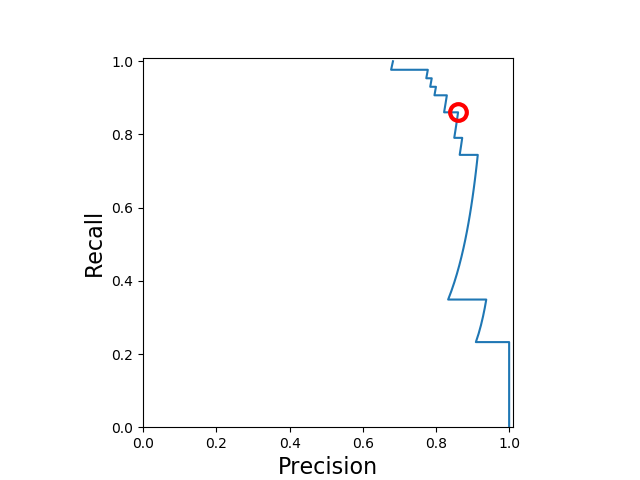

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [37]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

The red circle indicates the precision and recall that's achieved when the decision threshold is zero. So you can see that in this particular application there is a general downward trend. So as the precision of the classifier goes up, the recall tends to go down. 

In this particular case you'll see also that It's not exactly a smooth curve. There are some jagged edges, and in fact the jumps tend to get a little bigger as we approach maximum precision. This is a consequence of how the formulas for precision and recall are computed. They use discrete counts that include the number of true positives. And so as the decision threshold increases, there are fewer and fewer points that remain as positive predictions. So the fractions that are computed for these smaller numbers can change pretty dramatically with small changes in the decision threshold, and that's why these sort of trailing edges of the Precision-recall curve can appear a bit jagged when you plot them.

### ROC curves, Area-Under-Curve (AUC)

**ROC** curves or **receiver operating characteristic curves** are a very widely used visualization method that illustrate the performance of a binary classifier. ROC curves on the X-axis show a classifier's False Positive Rate so that would go from 0 to 1.0, and on the Y-axis they show a classifier's True Positive Rate so that will also go from 0 to 1.0. 

The ideal point in ROC space is one where the classifier achieves zero, a false positive rate of zero, and a true positive rate of one. So that would be the upper left corner of the plot. So just as in the precision recall case, as we vary decision threshold, we'll get different numbers of false positives and true positives that we can plot on a chart.

<IPython.core.display.Javascript object>


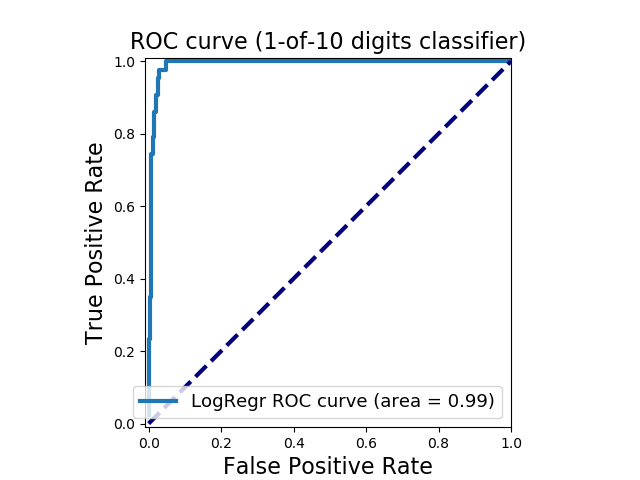

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [38]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

The dotted line here is the classifier curve that results from a classifier that randomly guesses the label for a binary class. So the dotted line here is used as a base line. A bad classifier will have performance that is close to this random curve (the dotted line). A reasonably good classifier will give an ROC curve that is consistently better than random across all decision threshold choices. And finally an excellent classifier would be one like the one plotted above, which is way up into the left. This particular example is the logistic regression classifier previously used in this notebook.

We can qualify the goodness of a classifier by looking at how much area there is underneath the curve. We use something called area under the curve, AUC. That's the single number that measures this total area underneath the ROC curve as a way to summarize a classifier's performance. So, an AUC of zero represents a very bad classifier, and an AUC of 1 will represent an optimal classifier.

<IPython.core.display.Javascript object>


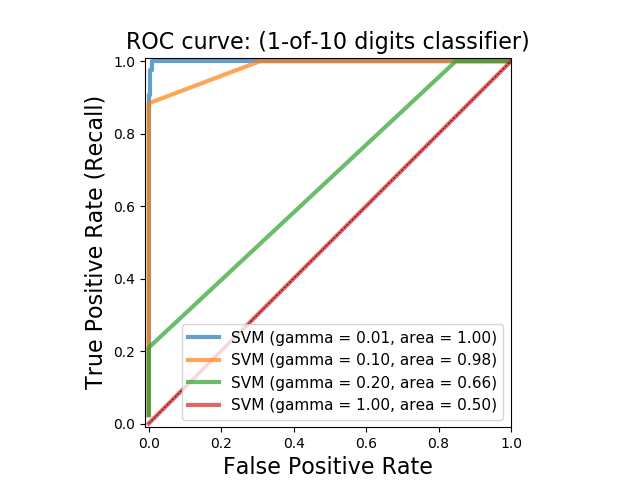

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [39]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Evaluation measures for multi-class classification

#### Multi-class confusion matrix

In [ ]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Multi-class classification report

In [ ]:
print(classification_report(y_test_mc, svm_predicted_mc))

#### Micro- vs. macro-averaged metrics

In [ ]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

In [ ]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

### Regression evaluation metrics

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

### Model selection using evaluation metrics

#### Cross-validation example

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

#### Grid search example

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


#### Evaluation metrics supported for model selection

In [ ]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

### Two-feature classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

#### Precision-recall curve for the default SVC classifier (with balanced class weights)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))